# Introduction

The evolution of the magnetic field is governed by the induction equation. In the MHD approximation, it can be written as

\begin{equation}
\frac{\partial \bf B}{\partial t} = \nabla \times \left( \bf v \times B \right)\,,
\end{equation}

where ${\bf v}$ is the velocity of the fluid and ${\bf B}$ is the magnetic field. The velocity evolution is coupled that of the magnetic field via the Lorentz force ($\propto \nabla\times {{\bf B} \times {\bf B}}$). For simplicity, assume that ${\bf B}$ does not affect ${\bf v}$, so we can prescribe ${\bf v}$ externally. This is usually called the "kinematic" regime, where the momentum equation is solved decoupled from the induction equation (or just provides an external velocity field). Note that even in this regime, ${\bf v}$ is, in general, a function of time and the three spatial coordinates.

Induction equation is not a conservative equation. To illustrate this, let us expand the R.H.S. of the induction equation:

\begin{equation}
\nabla \times \left( \bf v \times B \right) = {\bf v} \left( \nabla \cdot {\bf B} \right) - {\bf B} \left( \nabla \cdot {\bf v} \right) + \left({\bf B} \cdot \nabla\right) {\bf v} -   \left({\bf v} \cdot \nabla\right) {\bf B}   \,.\
\end{equation}

Since $\nabla \cdot B = 0$, the first term vanishes. Thus, the induction equation reads

\begin{equation}
\frac{D{\bf B}}{Dt} = \frac{\partial \bf B}{\partial t} + \left({\bf v} \cdot \nabla\right) {\bf B} = \left({\bf B} \cdot \nabla\right) {\bf v} - {\bf B} \left( \nabla \cdot {\bf v} \right)\,, 
\end{equation}

where $D/Dt = \partial_t + {\bf v}\cdot \nabla$ is the material derivative. 

As written above, the induction equation implies that the magnetic field is not conserved along fluid lines. It is not conserved because of source terms related to compression ($\nabla . {\bf v}\neq 0$) and velocity gradients along the magnetic field ($\left({\bf B}\cdot \nabla\right) {\bf v}$). This last term, when coupled to the Lorentz force leads to Alfvén waves.

Also, an update of the magnetic field must satisfy the solenoidal condition. This condition is clearly met analytically, but developing a numerical solver that does conserve $\nabla\cdot B$ imposes additional complications. 

The form of the induction equation combined with (i) the solenoidal constraint and (ii) a new family of waves that appear when coupling it with the momentum equation, makes it a challenging problem. 
However, some insight can be obtained by studying particular configurations where the induction gets simple.


-------
# Advection of magnetic fields

# Case 1 - ${\bf B} = B {\bf e}_z$ and ${\bf v} = v_x {\bf e}_x + v_y {\bf e}_y$ in a 2D sheet ($\partial_z = 0$)

- Assumptions: Let us consider a velocity field orthogonal to the magnetic field. Without loss of generality, we rotate the frame of reference such that ${\bf B} = B_z(x,y) {\bf e}_z$ and ${\bf v} = v_x(x,y) {\bf e}_x + v_y(x,y) {\bf e}_y$.


- Induction equation: Under the assumptions above, the term $(\bf B\cdot \nabla) {\bf v}$ vanishes, and the induction equation becomes

\begin{equation}
\frac{\partial B_z}{\partial t} + {\bf v} \cdot \nabla{B_z} = - {B_z} \nabla \cdot {\bf v}\,,
\end{equation}

which can be written in conservative form:

\begin{equation}
\frac{\partial B_z}{\partial t} + \nabla \cdot \left( B_z {\bf v}\right) = 0\,.
\end{equation}

So, the magnetic field is passively advected by the velocity field. It behaves as the density in the continuity equation, so it can be solved using the solvers you already know.


- Solenoidal constraint: For any given time, the magnetic field is of the form:

\begin{equation}
{\bf B}(x,y,t) = B_z(x,y,t) {\bf e}_z, 
\end{equation}

so, its divergence is:

\begin{equation}
\nabla \cdot {\bf B} = \partial_z \left( {B_z}(x,y,t)\right) = 0\,,
\end{equation}

which is a property independent of the method used to update the field.

### Task 1:

#### Implement an advection scheme (1D or 2D) and advect a magnetic field perpendicular to a given velocity field.

In [2]:
# ...

------------
# Case 2 - ${\bf B} = B_x {\bf e}_x + B_y {\bf e}_y$ and ${\bf v} = v_x {\bf e}_x + v_y {\bf e}_y$ in a 2D sheet ($\partial_z = 0)$

- Asumptions: Consider a 2D velocity and magnetic fields such that ${\bf B} = B_x(x,y) {\bf e}_x + B_y(x,y) {\bf e}_y$ and ${\bf v} = v_x(x,y) {\bf e}_x + v_y(x,y) {\bf e}_y$. Assume the problem to be 2D, so $\partial_z = 0$. 


- Induction equation: Under the assumptions above, the induction equation reads better in terms of the vector potential ${\bf A}$ (such that ${\bf B} = \nabla \times {\bf A}$), which, because of the form of ${\bf B}$, only has component along the $z$ direction (i.e., ${\bf A} = A {\bf e}_z$). In this case, the induction equation reads

    \begin{align}
        \partial_t \left(\nabla \times {\bf A}\right) + \nabla \times \left[\left(\nabla \times {\bf A}\right) \times {\bf v}\right] &= 0 \nonumber \\
    \nabla \times \left[ \partial_t {\bf A} + \left(\nabla \times {\bf A}\right) \times {\bf v} \right] &= 0 \nonumber \\
    \nabla \times \left[ \left(\partial_t A + {\bf v}\cdot \nabla A\right) {\bf e}_z \right] &= 0 \nonumber 
    \end{align}

    The term in brackets is clearly the gradient of some scalar potential, i.e.:

    \begin{equation}
    \partial_t A + {\bf v}\cdot \nabla A = \partial_z \phi 
    \end{equation}
    However, since the problem is 2D, the R.H.S. is zero, implying

    \begin{equation}
    \frac{D A}{Dt} = \frac{\partial A}{\partial t} + {\bf v}\cdot \nabla A = 0\,.
    \end{equation}
    Thus, the vector potential is strictly conserved along the streamlines of the fluid.

    Once we solve the equation for the potential, the magnetic field is:

\begin{equation}
{\bf B} = \frac{\partial A}{\partial y} {\bf e}_x - \frac{\partial A}{\partial x} {\bf e}_y\,.
\end{equation}

- Solenoidal constraint: Since we solve for the scalar potential, the solenoidal property of the magnetic field is automatically satisfied.



### Simple discretization of the transport equation and numerical solution

The equation we want to solve is:

\begin{equation}
\partial_t A + {\bf v} \cdot \nabla A = 0\,.
\end{equation}

This equation is equivalent to:
\begin{equation}
\frac{DA}{Dt} = 0\,,
\end{equation}
i.e., A is conserved quantity along the flow lines.


The simplest thing is to use operator splitting + finite differences, and write:

\begin{align}
A^{n+1} - A^{n} = \frac{v_i \Delta t}{\Delta x} \left(A_{i+1/2}^{n+1/2} - A_{i-1/2}^{n+1/2} \right) = 0\,.
\end{align}

So, the crucial step is to determine good representations of $A_{i\pm1/2}^{n+1/2}$. For simplicity, we provide a very simple first-order upwind (diffusive) method, however, higher order methods can be implemented.

--------
### Task 2: Create a 2D mesh that will constitute the domain of the problem
You may use the code below, which constitutes a partial solution, as a starting point.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
#Some customization
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['image.origin'] = 'lower'

In [4]:
class Mesh():
    """
    Class to store the domain of the problem
    """
    def __init__(self,xmin,xmax,ymin,ymax,nx,ny):
        
        # Parameters
        self.xmin = xmin
        self.xmax = xmax
        self.ymin = ymin
        self.ymax = ymax
        self.nx   = nx
        self.ny   = ny
        self.extent = [xmin,xmax,ymin,ymax] #Useful for imshow

        # The mesh is created here....
        #x    = ...
        #y    = ...
        #self.dx   = ...
        #self.dy   = ...
            
        #This is the 2D mesh
        #self.x,self.y = np.meshgrid(x,y)

mesh = Mesh(-0.5,0.5,-0.5,0.5,200,200) #This is how we use the mesh class

-----------------
### Task 3: Initialize the external velocity field ${\bf v}$ on the mesh and plot it

The test problem suggested is to initialize a rotating region and magnetic lines parallel to the y-axis. This test is similar to the well-known (full MHD) rotor test.

The test consists in definining a rotating region centered at $x_0=y_0=0$, described by:

\begin{align}
v_x &= \left\{
\begin{array}{cl}
  -v_\theta\sin{\theta} & r \leq r_1 \\
  -f(r)v_\theta\sin{\theta} & r_1 < r < r_2 \\
  0 & r \geq r_2\\
\end{array}\right. \nonumber \\
v_y &= \left\{
\begin{array}{cl}
  v_\theta\cos{\theta} & r \leq r_1 \\
  f(r)v_\theta\cos{\theta} & r_1 < r < r_2 \\
  0 & r \geq r_2\\
\end{array}\right. \nonumber
\end{align}

with $r=\sqrt{x^2+y^2}$, $\tan{\theta} = y/x$, $v_{\theta} = \Omega_0 r$, and the smoothing function $f(r)=(r_2-r)/(r_2-r_1)$. $\Omega_0$ is the angular frequency of the rotating region.

#### Suggested parameters for the mesh:

$x_{\rm min} = -0.5$, $x_{\rm max} =  0.5$, 

$y_{\rm min} = -0.5$, $y_{\rm max} =  0.5$ 

$\Omega_0 = 1.0$ 

$r_1 = 0.3$, $r_2 = 1.1 r_1$

In [5]:
def velocity_field(mesh, r1, omega0):
    
    """
    Returns the velocity field
    """
    
    r2      = 1.1*r1 # Smoothing (10%)

    # Definitions
    #r     = ... # Polar radius 
    #theta = ... # Polar angle
    #vphi  = ... # Azimuthal velocity
    #f     = ... # Smoothing function

    # Velocity arrays
    vx   = np.zeros(mesh.x.shape)
    vy   = np.zeros(mesh.x.shape)

    # Initialize the velocity field
    #vx[r<r2] = ... 
    #vy[r<r2] = ...
    #vx[r<r1] = ...
    #vy[r<r1] = ...
    
    return vx, vy

# Parameters
omega_0 = 10.0   # Angular frequency of the spinning region
r1      = 0.3    # Radius of the spinning region

mesh = Mesh(-0.5,0.5,-0.5,0.5,200,200)
vx, vy = velocity_field(mesh,0.3,10.0)

AttributeError: 'Mesh' object has no attribute 'x'

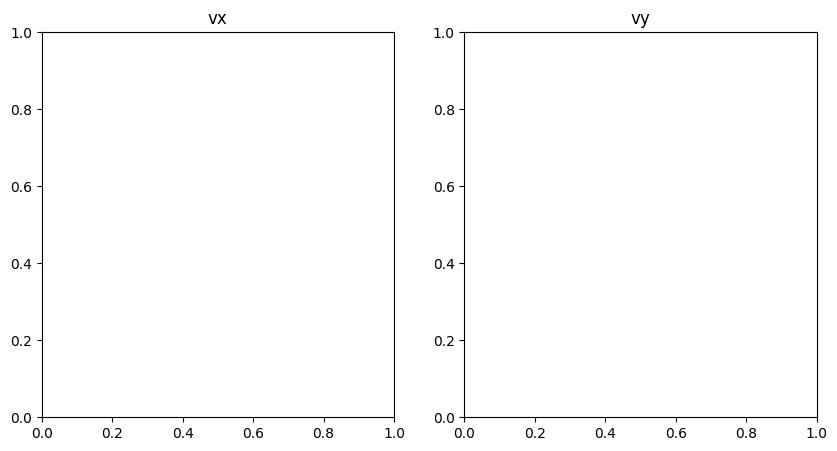

In [6]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("vx")

plt.subplot(1,2,2)
plt.title("vy")
plt.show()

---------
### Task 4: 

#### 4a) Plot streamlines of the velocity field on top of each component of the velocity field (Tip: use streamplot() from matplotlib). 

#### 4b) Does the plot make sense? Explain what you observe.

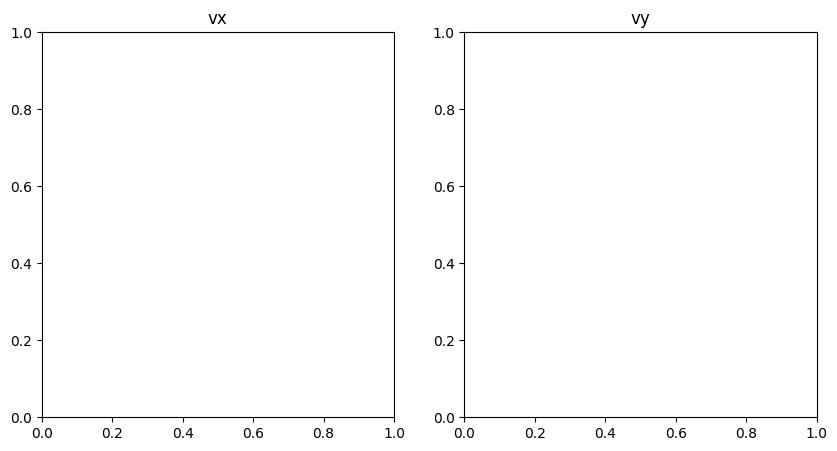

In [7]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("vx")
#...

plt.subplot(1,2,2)
plt.title("vy")
#...

plt.show()

### Task 5: Initial magnetic field

#### 5a) Initialize a constant magnetic field parallel to the y-axis (i.e., $B_x = 0$) using the vector potential.

Help: Since, in the simple problem under consideration ${\bf B} = \partial_y A {\bf e}_x - \partial_x A {\bf e}_y$, if $B_x$ = 0, the potential vector does not depend on $y$. Furthermore, since $B_y$ is constant, the vector potential satisfies:

\begin{equation}
\partial_x A = c
\end{equation}

which implies that the potential vector is of the form:

\begin{equation}
 A(x) = cx + A_0
\end{equation}

#### 5b) Take c=1, A_0=0, and initialize the vector potential

In [8]:
#Ainit = ...
plt.imshow(Ainit,extent=mesh.extent)

NameError: name 'Ainit' is not defined

### Task 6: Magnetic lines

Magnetic lines can be plotted with the same function used to plot the streamlines of the velocity field (streamplot()), however, it requires obtaining ${\bf B}$ from $A_z$, which involves derivatives. In the simple problem under consideration, however, it is actually very simple to plot the magentic lines.

By definition, magnetic lines are tangent to the magnetic vector (similarly, streamlines are tangent to the velocity vector field).

Let's do the following calculation:

\begin{equation}
{\bf B} \cdot \nabla A_z = \left(\partial_y A_z {\bf e}_x - \partial_x A_z {\bf e}_y \right) \cdot \left( \partial_x A_z {\bf e}_x + \partial_y A_z {\bf e}_y\right) = \partial_y A_z \partial_x A_z -\partial_x A_z \partial_y A_z = 0
\end{equation}

It shows shows that ${\bf B}$ is perpendicular to $\nabla A_z$. Isocontours of $A_z$ are perpendincular to $\nabla A_z$, so they must be parallel to ${\bf B}$. We then conclude that isocontours of $A_z$ are magentic lines.

#### 6a) Compute the magnetic field from the vector potential and plot magnetic lines of the initial condition using streamplot().

#### 6b) Plot magnetic lines of the initial condition as isocontours of $A_z$.

#### 6c) Why does streamplot swap the sign of one magnetic line at the begining of the plot? Tip: Is the initial condition periodic in the X direction?

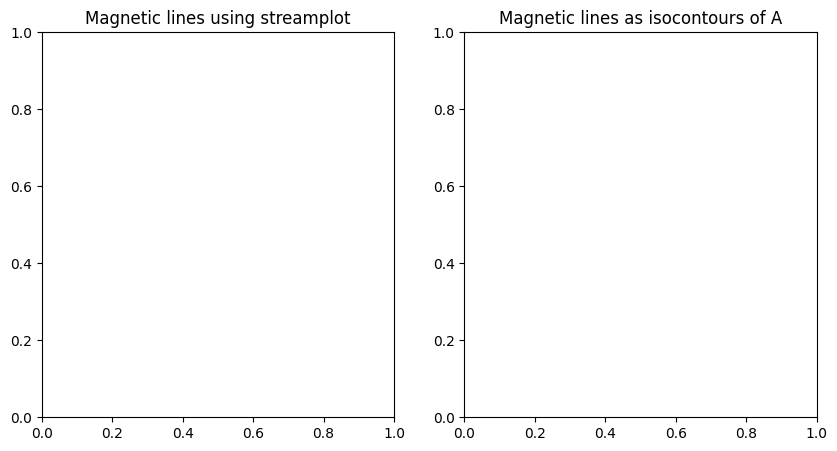

In [9]:
plt.figure(figsize=(10,5))

#We calculate the magnetic field from A (bx = d_y A, by = -d_x A)
#bx = ...
#by = ...

plt.subplot(1,2,1)
plt.title("Magnetic lines using streamplot")
#...

plt.subplot(1,2,2)
plt.title("Magnetic lines as isocontours of A")
#...

plt.show()

### Task 7: Evolve the induction equation to find $A(t)$

In [10]:
class Transport():
    """
    This is the class we use to transport the vector potential
    """
    def advect(self,dt,axis):
        """
        1st order scheme "Donor cell"
        """
    
        if axis == 0:
            v = self.vy
            delta = self.mesh.dy

        if axis == 1:
            v = self.vx
            delta = self.mesh.dx
    
        pv = np.where(v>0)
        nv = np.where(v<=0)

        Am = np.roll(self.A, +1, axis=axis)
        Ap = np.roll(self.A, -1, axis=axis)

        self.A[pv] -= dt/delta*v[pv]*(self.A[pv]-Am[pv])
        self.A[nv] -= dt/delta*v[nv]*(Ap[nv]-self.A[nv])
    
    def __init__(self,mesh,vx,vy,A):

        #CFL condition
        self.dt = 0.5*np.sqrt(mesh.dx**2+mesh.dy**2)/np.max(np.sqrt(vx**2+vy**2))
        
        self.mesh = mesh
        self.vx = vx
        self.vy = vy
        self.A  = np.copy(A)
        
    def update(self,total_time):

        time = 0
        while(time < total_time):
        
            # We check we are beyond the requested output_time
            if time+self.dt > total_time:
                effective_dt = total_time-time
            else:
                effective_dt = self.dt
        
            # Simple operator split (first transport along X, then along Y)
            self.advect(effective_dt,axis=1)
            self.advect(effective_dt,axis=0)
            
            time += effective_dt

#### Example of use

In [11]:
mesh  = Mesh(-0.5,0.5,-0.5,0.5,100,100)     # We create the mesh
vx,vy = velocity_field(mesh, 0.3, 10.0)     # We initialize a velocity field
A     = mesh.x                              # Initial condition for the vector potential

transport = Transport(mesh,vx,vy,A)         # Instantiate the Transport class

# Plot the initial condition
time = 0.0
plt.contour(transport.mesh.x,transport.mesh.y,transport.A,10,colors='k',linestyles='solid')
plt.title("time {:f}".format(time))
plt.show()

# Advance the induction equation
dt     = 0.01   # Integration step (Note that it is usually larger than the CFL condion)
nsteps = 2      # Number of Integration steps

for i in range(nsteps):
    transport.update(dt)
    
    # Plot the evolution of the magnetic lines
    time += dt
    plt.contour(transport.mesh.x,transport.mesh.y,transport.A,10,colors='k',linestyles='solid')
    plt.title("time {:f}".format(time))
    plt.show()

AttributeError: 'Mesh' object has no attribute 'x'

### Reconnection due to finite numerical resistivity

#### 7a) Use $\Omega_0 = 10$, $nx=ny=100$ and evolve $A$ by steps $\Delta t = 0.1$ until reaching a final time $t = 0.5$. For each step, plot the magentic line associated with the isocontours $A = 0$. 


    - What happens with the magnetic line? Is this what you expected from theoretical arguments?
    - Increase the number of grid-points to 400x400, what changes? Is this expected? Explain

In [12]:
#...

### Field expulsion due to numerical resitivity

We will study the steady-state solution of the system.

#### 7b) Use $n_x=n_y=200$ to evolve $A$ for a time $t=20$ by steps $\Delta t = 5$.  For each $\Delta t$, plot 20 magnetic lines in the range A=(-0.5,0.5).
    
Note that in steady-state, our problem reads:
\begin{equation}
{\bf v}\cdot \nabla A_z = 0
\end{equation}
However, magnetic lines are isocontours of A:
\begin{equation}
{\bf B}\cdot \nabla A_z = 0
\end{equation}
so, in steady-state, ${\bf B}$ and ${\bf v}$ are parallel. Does the steady-state numerical solution show that?

#### 7c) For t=20, plot the streamlines on top of the magnetic lines. What happened with the magnetic field in the rotating region? Explain.

In [13]:
#...

### __Absalon turn-in__

This exercise is a little bit different from past exercises by having a number of smaller tasks embedded in to the notebook. If you create the solution inline, please remember to clean it up and copy your solution down beyond this cell. Upload your notebook together with a pdf of the notebook as a solution to the exercise

#### Task 1
Implement an advection scheme (1D or 2D) and advect a magnetic field perpendicular to a given velocity field.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['image.origin'] = 'lower'

In [16]:
def spacial_deriv(f, ds, axis = 0, order = 2):
    return (np.roll(f,-1,axis)-np.roll(f,+1,axis))/(2.0*ds)

def Courant(C,v,ds):
    dt = C / np.max(v/ds)
    return dt

def advection_mag(Lx = 1.0, Ly = 1.0, Nx = 100, Ny = 100, C = 0.5):
    # Settup the grid
    dx, dy = Lx / Nx, Ly / Ny  # Grid spacing
    x = np.linspace(0, Lx, Nx)
    y = np.linspace(0, Ly, Ny)
    X, Y = np.meshgrid(x, y)

    # Velocity field
    v_x = np.ones((Ny, Nx))  # Constant x-component
    v_y = np.zeros((Ny, Nx))  # Zero y-component

    # Magnetic field B_z perpendicular to the velocity field with a sinusodial perturbation in the x direction
    B_pert = np.sin(X)
    B_z = np.zeros((Ny, Nx)) + B_pert

    B_z_init = np.copy(B_z)

    # Time stepper setup
    dt = Courant(C, v_x, dx)

    for i in range(1000):
        # Advection step
        B_z -= dt * (v_x * spacial_deriv(B_z, dx, axis=1) + v_y * spacial_deriv(B_z, dy, axis=0))

    return B_z, B_z_init

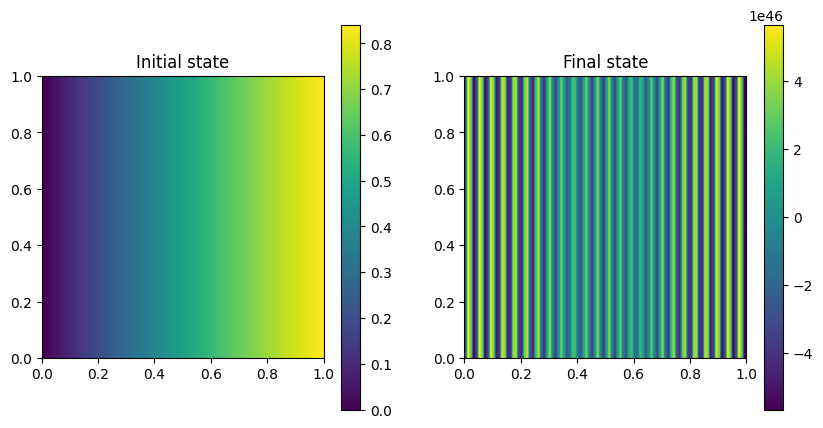

In [17]:
# Plotting the results (initial and final state) side by side
B_z, B_z_init = advection_mag()

plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
plt.imshow(B_z_init, extent = [0, 1, 0, 1])
plt.title("Initial state")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(B_z, extent = [0, 1, 0, 1])
plt.title("Final state")
plt.colorbar()

### Task 2
Create a 2D mesh that will constitute the domain of the problem.

In [52]:
class Mesh():
    """
    Class to store the domain of the problem
    """
    def __init__(self, xmin, xmax, ymin, ymax, nx, ny):
        
        # Parameters
        self.xmin = xmin
        self.xmax = xmax
        self.ymin = ymin
        self.ymax = ymax
        self.nx   = nx
        self.ny   = ny
        self.extent = [xmin, xmax, ymin, ymax] #Useful for imshow

        # The mesh is created here....
        x    = np.linspace(self.xmin, self.xmax, num=self.nx)
        y    = np.linspace(self.ymin, self.ymax, num=self.ny)
        self.dx   = (self.xmax-self.xmin)/self.nx
        self.dy   = (self.ymax-self.ymin)/self.ny
            
        #This is the 2D mesh
        self.x, self.y = np.meshgrid(x, y)

### Task 3
Initialize the external velocity field ${\bf v}$ on the mesh and plot it.<br><br>
The test consists in definining a rotating region centered at $x_0=y_0=0$, described by:

\begin{align}
v_x &= \left\{
\begin{array}{cl}
  -v_\theta\sin{\theta} & r \leq r_1 \\
  -f(r)v_\theta\sin{\theta} & r_1 < r < r_2 \\
  0 & r \geq r_2\\
\end{array}\right. \nonumber \\
v_y &= \left\{
\begin{array}{cl}
  v_\theta\cos{\theta} & r \leq r_1 \\
  f(r)v_\theta\cos{\theta} & r_1 < r < r_2 \\
  0 & r \geq r_2\\
\end{array}\right. \nonumber
\end{align}

with $r=\sqrt{x^2+y^2}$, $\tan{\theta} = y/x$, $v_{\theta} = \Omega_0 r$, and the smoothing function $f(r)=(r_2-r)/(r_2-r_1)$. $\Omega_0$ is the angular frequency of the rotating region.

In [53]:
def velocity_field(mesh, r1, omega0):
    
    """
    Returns the velocity field
    """
    
    r2      = 1.1*r1 # Smoothing (10%)

    # Definitions
    r     = np.sqrt(mesh.x**2 + mesh.y**2)      # Polar radius 
    theta = np.arctan2(mesh.y, mesh.x)          # Polar angle
    vphi  = omega0 * r                          # Azimuthal velocity
    f     = (r2 - r)/(r2 - r1)                  # Smoothing function

    # Velocity arrays
    vx   = np.zeros(mesh.x.shape)
    vy   = np.zeros(mesh.x.shape)

    # Initialize the velocity field
    np.putmask(vx, (r <= r1), -vphi * np.sin(theta))
    np.putmask(vx, (r >= r2), 0)
    np.putmask(vx, (r > r1) & (r < r2), -f * vphi * np.sin(theta))

    np.putmask(vy, (r <= r1), vphi * np.cos(theta))
    np.putmask(vy, (r >= r2), 0)
    np.putmask(vy, (r > r1) & (r < r2), f * vphi * np.cos(theta))
    
    return vx, vy

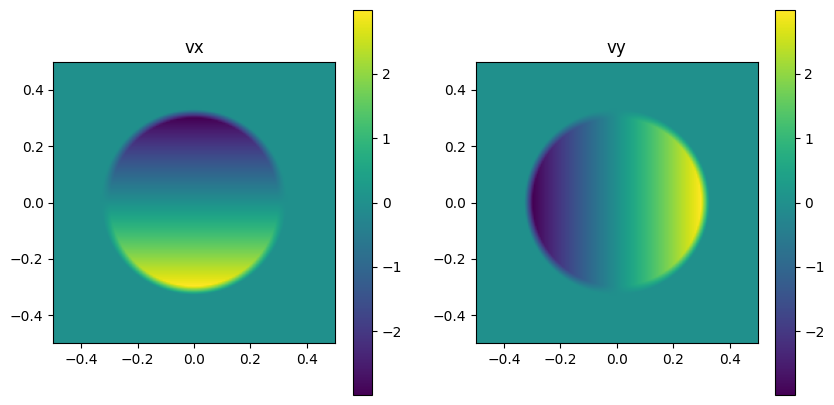

In [54]:
# Plotting the velocity field
plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
plt.title("vx")
plt.imshow(vx, extent = mesh.extent)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("vy")
plt.imshow(vy, extent = mesh.extent)
plt.colorbar()

### Task 4: 

#### 4a) Plot streamlines of the velocity field on top of each component of the velocity field (Tip: use streamplot() from matplotlib). 

#### 4b) Does the plot make sense? Explain what you observe.

Text(0.5, 1.0, 'Velocity, y-component')

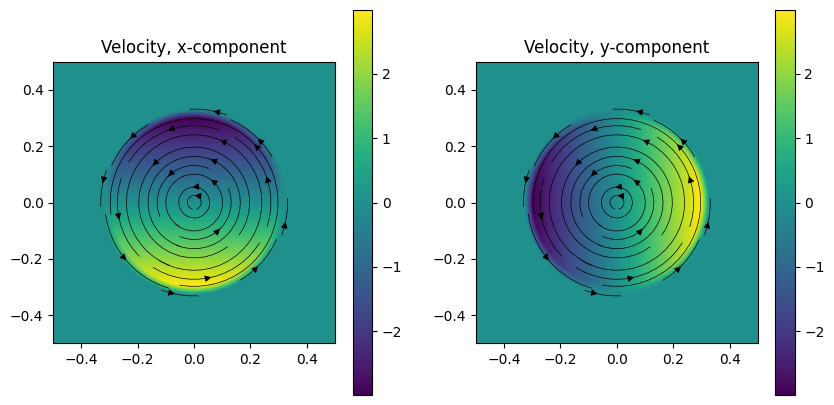

In [55]:
# Making one plot of the streamlines and two plots with the streamlines plottede on top of each component of the velocity field
plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
plt.streamplot(mesh.x, mesh.y, vx, vy, color = 'black', linewidth = 0.5)
plt.imshow(vx, extent = mesh.extent)
plt.colorbar()
plt.title("Velocity, x-component")

plt.subplot(1, 2, 2)
plt.streamplot(mesh.x, mesh.y, vx, vy, color = 'black', linewidth = 0.5)
plt.imshow(vy, extent = mesh.extent)
plt.colorbar()
plt.title("Velocity, y-component")

<b>Comments of the plots</b>: These three plots illustrate the components and streamlines of the velocity field. First we see the x-component of the velocity field ($v_{x}$). In this plot we clearly see a radial variation that's symmetric about the y-axis. Inside $r_{1}$, we observe that $v_{x}$ is proportional to $-sin(\theta)$, resulting in the symmetric pattern with positive and negative values. In the transition region ($r_{1} < r < r_{2}$), the amplitude decreases (due to the smoothing function $f(r)$), and $v_{x}$ drops to zero outside $r_{2}$ as expected. <br><br>
In the next plot we see the y-component ($v_{y}$), which behaves similarly to the x-component but is proportional to $cos(\theta)$ and thus creating an orthogonal velocity pattern relative to $v_{x}$ with positive values on the right side and negative values on the left. We observe the same reduction in amplitude in the transition region and the zero values outside $r_{2}$. 
<br><br>
The streamlines exhibit a rotational flow, consistent with the velocities behaving as expected. So the plots correctly show what we would expect given the conditions given for $v_{x}$ and $v_{y}$ in the task.

### Task 5: Initial magnetic field

#### 5a) Initialize a constant magnetic field parallel to the y-axis (i.e., $B_x = 0$) using the vector potential.
Help: Since, in the simple problem under consideration ${\bf B} = \partial_y A {\bf e}_x - \partial_x A {\bf e}_y$, if $B_x$ = 0, the potential vector does not depend on $y$. Furthermore, since $B_y$ is constant, the vector potential satisfies:

\begin{equation}
\partial_x A = c
\end{equation}

which implies that the potential vector is of the form:

\begin{equation}
 A(x) = cx + A_0
\end{equation}

#### 5b) Take c = 1, $A_{0} = 0$, and initialize the vector potential

Text(0.5, 1.0, 'Magnetic field, y-component (constant field)')

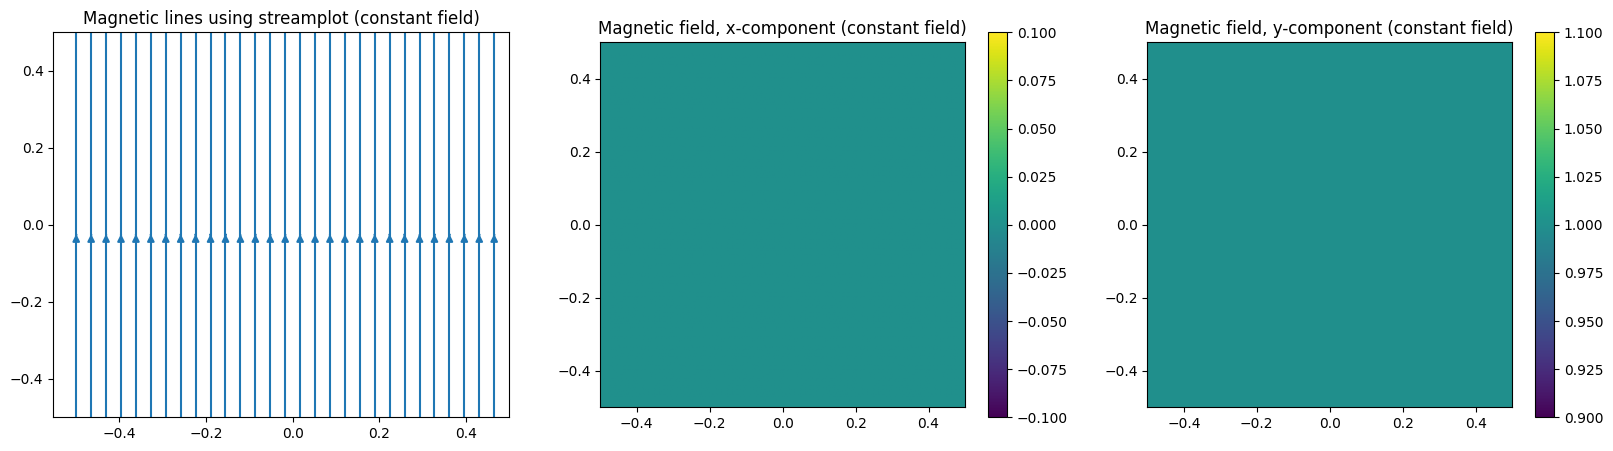

In [56]:
A_0, c = 0, 1
Ainit = A_0 + c * mesh.x

# Initializing a constant magnetic field parallel to the y-axis using the vector potential
bx = np.zeros(mesh.x.shape)
by = np.ones(mesh.x.shape)

# Plotting the magnetic field
plt.figure(figsize = (20, 5))

plt.subplot(1, 3, 1)
plt.streamplot(mesh.x, mesh.y, bx, by)
plt.title("Magnetic lines using streamplot (constant field)")

plt.subplot(1, 3, 2)
plt.imshow(bx, extent = mesh.extent)
plt.colorbar()
plt.title("Magnetic field, x-component (constant field)")

plt.subplot(1, 3, 3)
plt.imshow(by, extent = mesh.extent)
plt.colorbar()
plt.title("Magnetic field, y-component (constant field)")


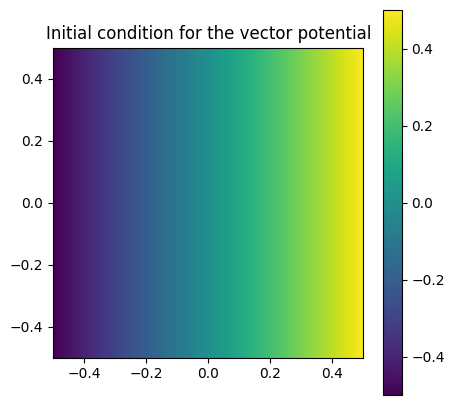

In [57]:
plt.imshow(Ainit, extent = mesh.extent)
plt.title("Initial condition for the vector potential")
plt.colorbar()

### Task 6
#### 6a) Compute the magnetic field from the vector potential and plot magnetic lines of the initial condition using streamplot().

#### 6b) Plot magnetic lines of the initial condition as isocontours of $A_z$.

#### 6c) Why does streamplot swap the sign of one magnetic line at the begining of the plot? Tip: Is the initial condition periodic in the X direction?

Text(0.5, 1.0, 'Magnetic lines as isocontours of A')

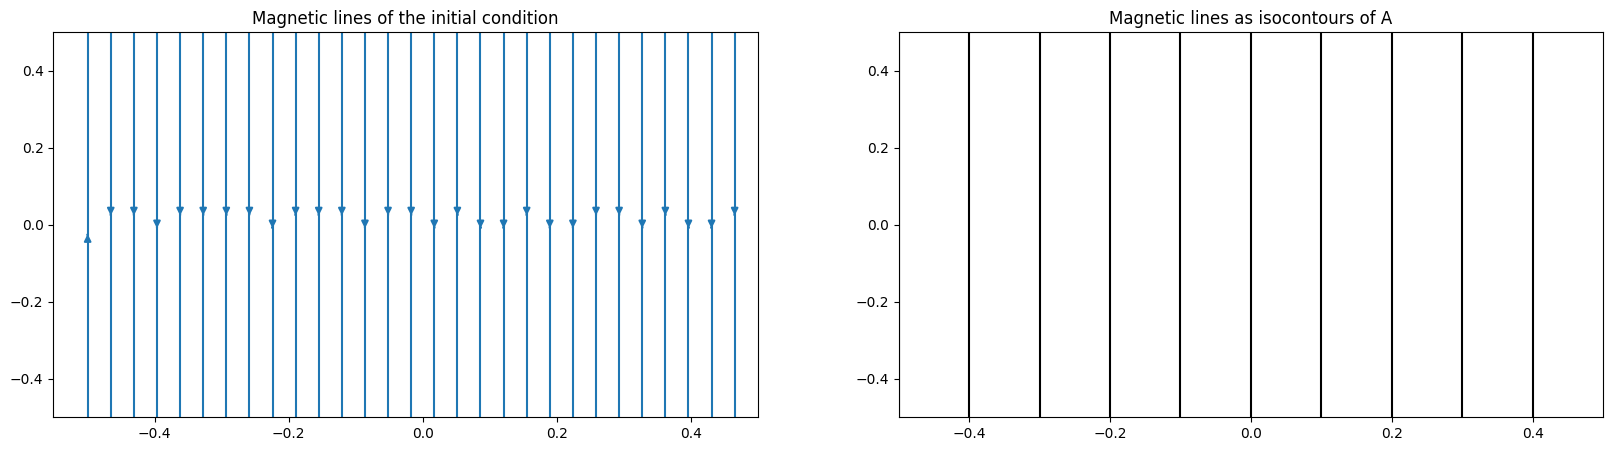

In [58]:
# Computing the magnetic field from the vector potential
bx = spacial_deriv(Ainit, mesh.dx, axis = 0)                # Positive sign because of the definition of the vector potential (bx = d_y A)
by = -spacial_deriv(Ainit, mesh.dy, axis = 1)               # Negative sign because of the definition of the vector potential (by = -d_x A)

# Plotting magnetic lines of the initial condition 
plt.figure(figsize = (20, 5))

plt.subplot(1, 2, 1)
plt.streamplot(mesh.x, mesh.y, bx, by)
plt.title("Magnetic lines of the initial condition")

# Plotting magnetic lines as isocontours of the vector potential
plt.subplot(1, 2, 2)
plt.contour(mesh.x, mesh.y, Ainit, 10, colors = 'k', linestyles = 'solid')
plt.title("Magnetic lines as isocontours of A")

<b>Comments of the $\texttt{streamplot}$</b>: As seen in the plot with the magnetic lines of the initial condition, the $\texttt{streamplot}$ function swaps the sign of one of the magnetic lines at the beginning of the plot. The $\texttt{streamplot}$ function assumes continuity across the plot, i.e., periodic boundary conditions. However, given the vector potential, $A_{z} = cx + A_{0}$, which increases linearly with $x$, it violates periodic boundary conitions. This results in a discontinuity in $A_{z}$ at the domain's edges, which $\texttt{streamplot}$ cannot handle properly and therefore, it swaps the sign.

### Task 7 - Reconnection due to finite numerical resistivity

#### 7a) Use $\Omega_0 = 10$, $nx=ny=100$ and evolve $A$ by steps $\Delta t = 0.1$ until reaching a final time $t = 0.5$. For each step, plot the magentic line associated with the isocontours $A = 0$. 

    - What happens with the magnetic line? Is this what you expected from theoretical arguments?
    - Increase the number of grid-points to 400x400, what changes? Is this expected? Explain

In [34]:
class Transport():
    """
    This is the class we use to transport the vector potential
    """
    def advect(self,dt,axis):
        """
        1st order scheme "Donor cell"
        """
    
        if axis == 0:
            v = self.vy
            delta = self.mesh.dy

        if axis == 1:
            v = self.vx
            delta = self.mesh.dx
    
        pv = np.where(v>0)
        nv = np.where(v<=0)

        Am = np.roll(self.A, +1, axis=axis)
        Ap = np.roll(self.A, -1, axis=axis)

        self.A[pv] -= dt/delta*v[pv]*(self.A[pv]-Am[pv])
        self.A[nv] -= dt/delta*v[nv]*(Ap[nv]-self.A[nv])
    
    def __init__(self,mesh,vx,vy,A):

        #CFL condition
        self.dt = 0.5*np.sqrt(mesh.dx**2+mesh.dy**2)/np.max(np.sqrt(vx**2+vy**2))
        
        self.mesh = mesh
        self.vx = vx
        self.vy = vy
        self.A  = np.copy(A)
        
    def update(self,total_time):

        time = 0
        while(time < total_time):
        
            # We check we are beyond the requested output_time
            if time+self.dt > total_time:
                effective_dt = total_time-time
            else:
                effective_dt = self.dt
        
            # Simple operator split (first transport along X, then along Y)
            self.advect(effective_dt,axis=1)
            self.advect(effective_dt,axis=0)
            
            time += effective_dt

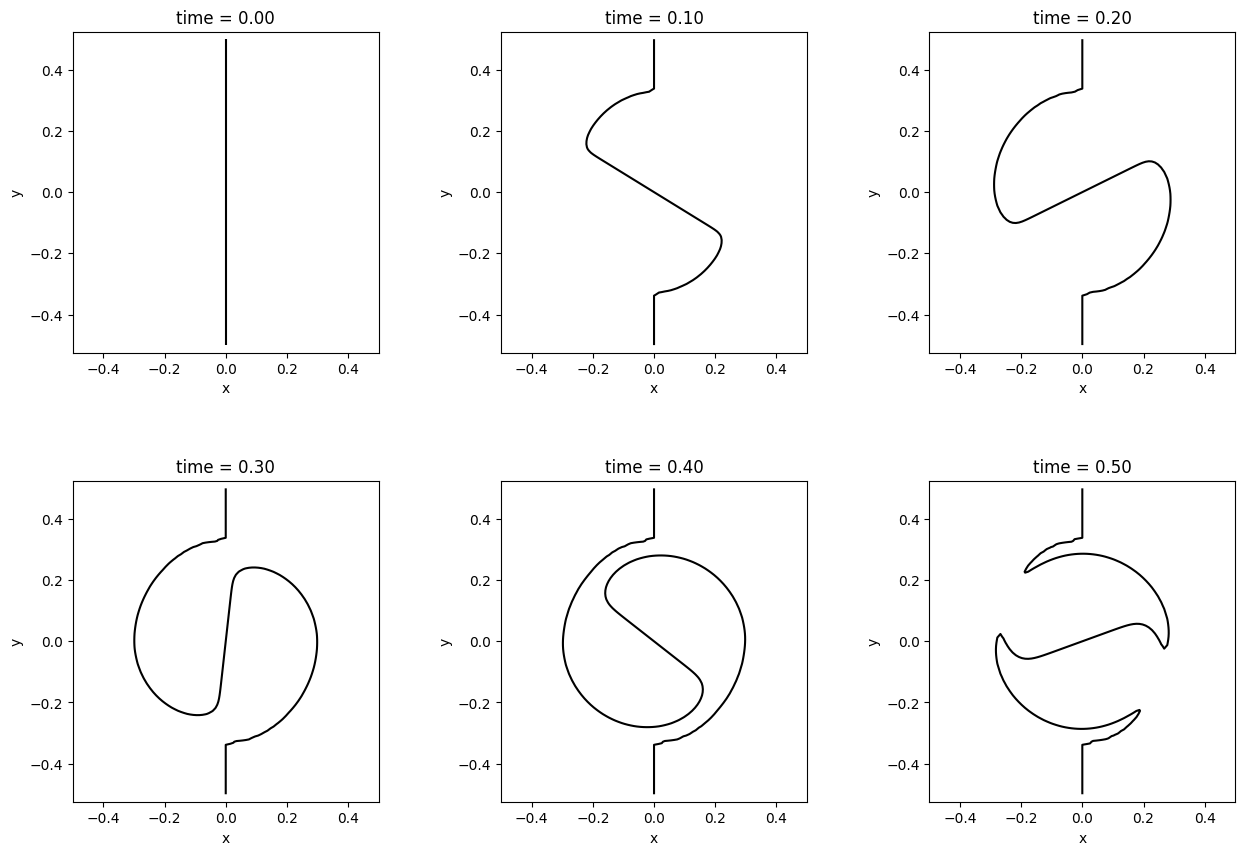

In [72]:
mesh  = Mesh(-0.5,0.5,-0.5,0.5,100,100)     # We create the mesh
vx, vy = velocity_field(mesh, 0.3, 10.0)    # We initialize a velocity field
A     = mesh.x                              # Initial condition for the vector potential

transport = Transport(mesh,vx,vy,A)         # Instantiate the Transport class

# Advance the induction equation
dt = 0.1   
nsteps = 5  
time = 0.0    

rows, cols = 2, 3
fig, axs = plt.subplots(rows, cols, figsize = (15, 10)) 
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)  

axs = axs.flatten()

for i in range(rows * cols):
    if time > final_time:               # Stop if the final time is exceeded
        break

    # Plot isocontour for A = 0
    ax = axs[i]
    c = ax.contour(transport.mesh.x, transport.mesh.y, transport.A, levels = 0, colors='k')  # Isocontour at A = 0
    ax.set_title(f"time = {time:.2f}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.axis('equal')

    # Evolve the system
    transport.update(dt)
    time += dt

plt.show()


<b>Comments on the plots</b>: As seen in the plots above, the mangetic lines are distorted over time. First they appear as straight lines (time 0.000), but as time progresses, the lines bend due to the influence of the velocity field. The velocity field redistributes the vector potential, which causes the magnetic fields to evolve. This is also expected from theoretical arguments, where the velocity field is causing advection and distortion of the magnetic field lines (described by the induction equation).

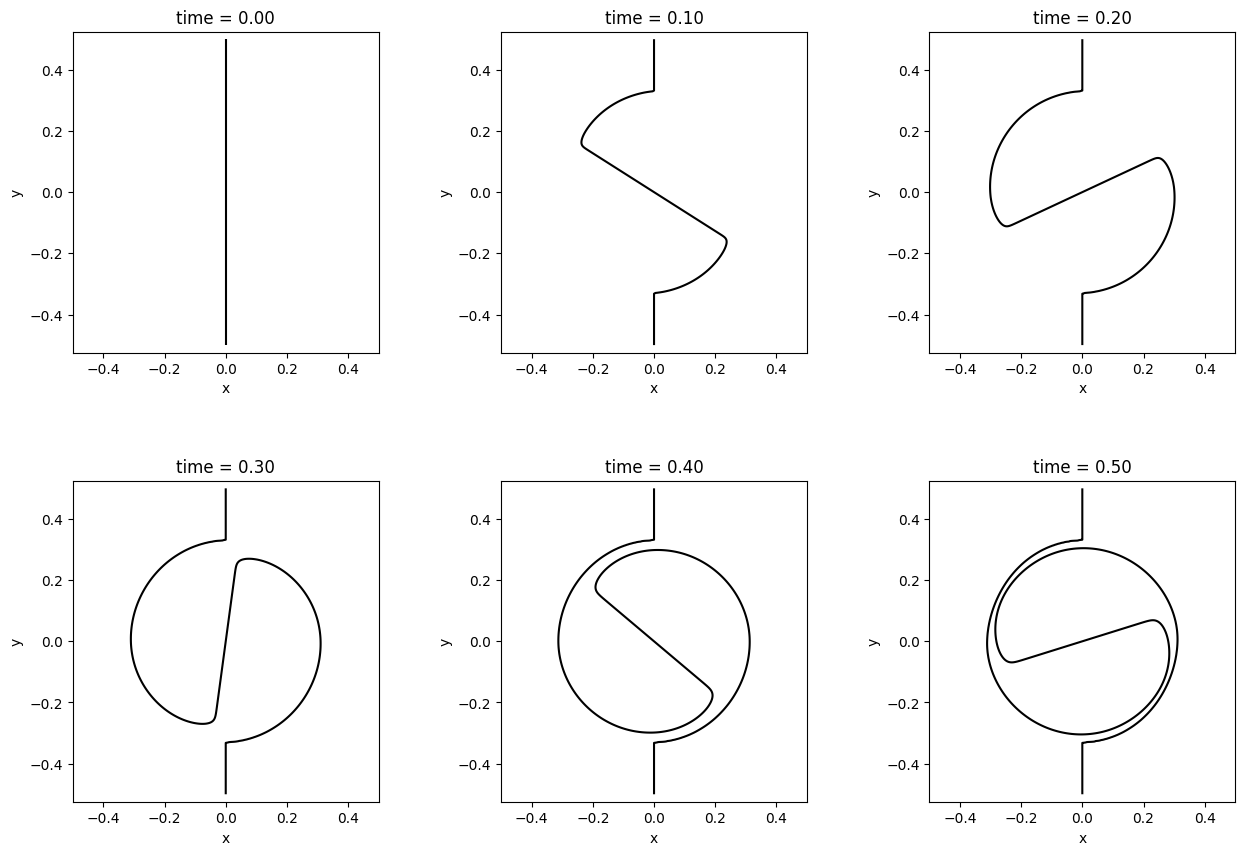

In [67]:
mesh = Mesh(-0.5, 0.5, -0.5, 0.5, 400, 400)
vx, vy = velocity_field(mesh, 0.3, 10.0)
A = mesh.x

transport = Transport(mesh, vx, vy, A)

# Time evolution
dt = 0.1
final_time = 0.5
time = 0.0

rows, cols = 2, 3
fig, axs = plt.subplots(rows, cols, figsize = (15, 10))  
fig.subplots_adjust(hspace = 0.4, wspace = 0.4) 

# Flatten the axes array for easy indexing
axs = axs.flatten()

for i in range(rows * cols):           
    if time > final_time:               
        break

    # Plot isocontour for A = 0
    ax = axs[i]
    c = ax.contour(transport.mesh.x, transport.mesh.y, transport.A, levels = 0, colors='k')  # Isocontour at A = 0
    ax.set_title(f"time = {time:.2f}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.axis('equal')

    # Evolve the system
    transport.update(dt)
    time += dt

plt.show()

<b>Comments on plots</b>: When increasing the grid to 400x400 (higher resolution), it is expected that the magnetic lines becomes smoother and more detailed - which is what we observe in the plots above. The distortion is more accurately represented, and the jagged lines we see in the plots using a 100x100 grid is gone. 

### Field expulsion due to numerical resitivity

#### 7b) Use $n_x=n_y=200$ to evolve $A$ for a time $t=20$ by steps $\Delta t = 5$.  For each $\Delta t$, plot 20 magnetic lines in the range A=(-0.5,0.5).
    
Note that in steady-state, our problem reads:
\begin{equation}
{\bf v}\cdot \nabla A_z = 0
\end{equation}
However, magnetic lines are isocontours of A:
\begin{equation}
{\bf B}\cdot \nabla A_z = 0
\end{equation}
so, in steady-state, ${\bf B}$ and ${\bf v}$ are parallel. Does the steady-state numerical solution show that?

#### 7c) For t = 20, plot the streamlines on top of the magnetic lines. What happened with the magnetic field in the rotating region? Explain.

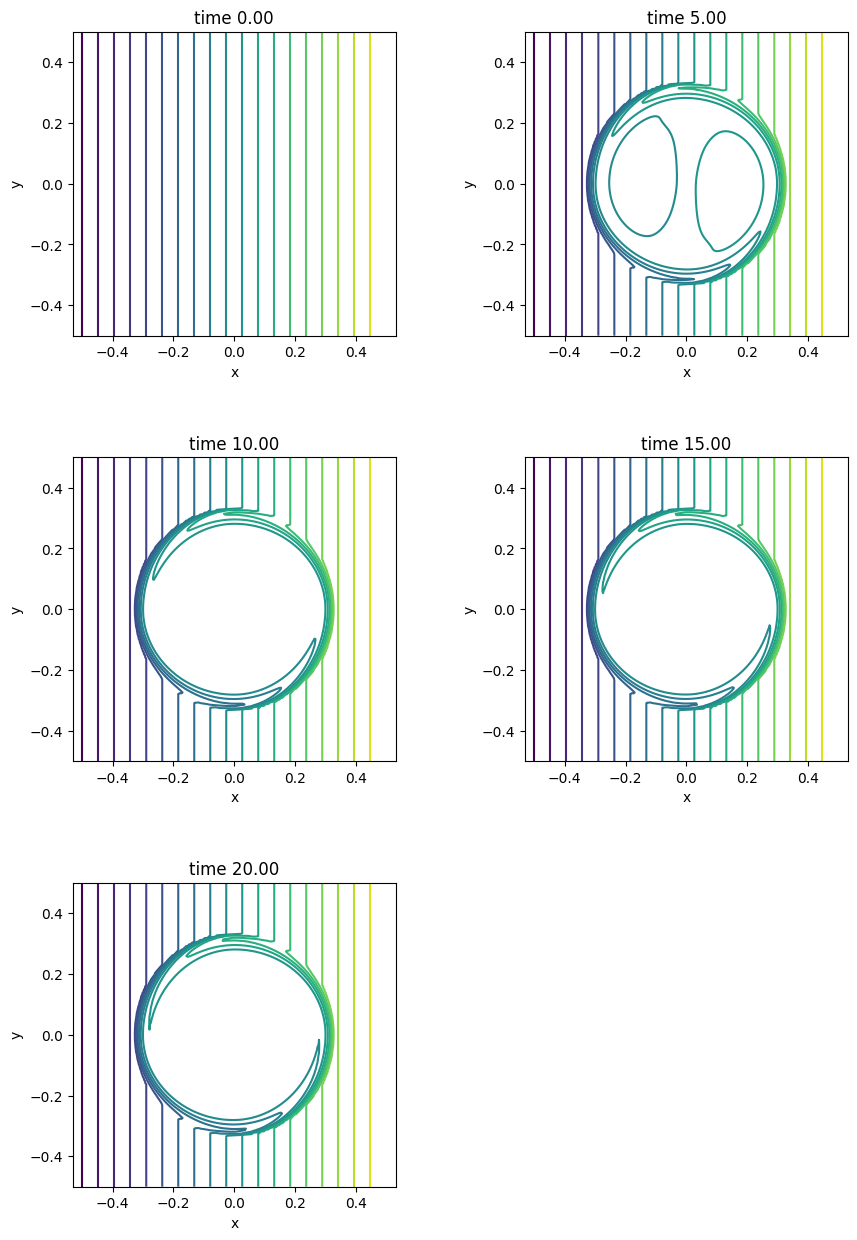

In [47]:
mesh  = Mesh(-0.5,0.5,-0.5,0.5,200,200)     
vx,vy = velocity_field(mesh, 0.3, 10.0)     
A = mesh.x                                  

transport = Transport(mesh, vx, vy, A)         

dt = 5                  
nsteps = 4              

rows, cols = 3, 2      
fig, axs = plt.subplots(rows, cols, figsize = (10, 15))  
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)  

axs = axs.flatten()

# Plot the initial condition
time = 0.0
ax = axs[0]
c = ax.contour(transport.mesh.x, transport.mesh.y, transport.A, levels = np.linspace(-0.5, 0.5, 20))
ax.set_title(f"time {time:.2f}")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.axis('equal')

# Advance the induction equation and plot evolution
for i in range(1, nsteps + 1):                          # Start at 1 since the first plot is already done
    transport.update(dt)       
    time += dt
    
    ax = axs[i]
    c = ax.contour(transport.mesh.x, transport.mesh.y, transport.A, levels = np.linspace(-0.5, 0.5, 20))
    ax.set_title(f"time {time:.2f}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.axis('equal')

# Hide unused subplots if the grid has extra space
for i in range(nsteps + 1, len(axs)):
    axs[i].axis('off')

plt.show()

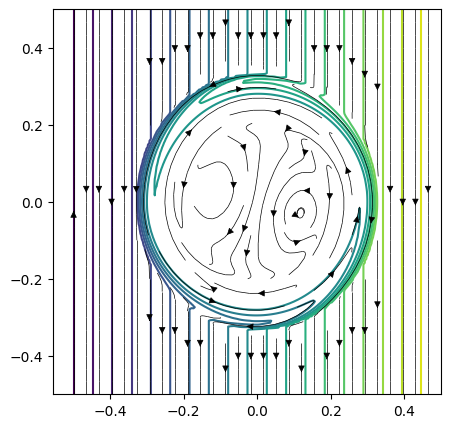

In [49]:
bx = spacial_deriv(transport.A, transport.mesh.dx, axis = 0)
by = -spacial_deriv(transport.A, transport.mesh.dy, axis = 1)

plt.contour(transport.mesh.x, transport.mesh.y, transport.A, levels = np.linspace(-0.5, 0.5, 20))
plt.streamplot(transport.mesh.x, transport.mesh.y, bx, by, color = "black", linewidth = 0.5)

<b>Comments on the plot</b>: As seen in the plot above, the magnetic field lines disappear in the rotating region. This is consistent with the principles of MHD, where is the rotation in the system is sufficiently strong, the magnetic field lines can become distorted such that they aren't present in the rotating region.